In [1]:
import numpy as np
import pandas as pd

### Quiz_2
- 타이타닉 데이터를 가져와서 연령대별 생존률을 구하고 그래프를 그리세요

In [2]:
# 타이타닉 데이터 가져오기
data = pd.read_csv("Train.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
# ["Survived","Age"] 컬럼을 가지는 titanic_df 데이터 프레임을 만들고 Age가 NaN인 row 데이터를 삭제

titanic_df = pd.DataFrame(data, columns=["Survived", "Age"])
titanic_df = titanic_df.dropna(how='any').reset_index(drop=True)

# or
#titanic_df = titanic_df.dropna
#titanic_df = titanic_df.reset_index(drop=True)

titanic_df.tail()

,Survived,Age
709,0,39.0
710,0,27.0
711,1,19.0
712,1,26.0
713,0,32.0


In [72]:
# Ages 컬럼을 만들고 Ages 컬럼에는 연령대에 대한 데이터 삽입

In [73]:
def get_Ages(age):
    if age >= 80:
        return 80
    elif age >= 70 and age < 80:
        return 70
    elif age >= 60 and age < 70:
        return 60
    elif age >= 50 and age < 60:
        return 50
    elif age >= 40 and age < 50:
        return 40
    elif age >= 30 and age < 40:
        return 30
    elif age >= 20 and age < 30:
        return 20
    elif age >= 10 and age < 20:
        return 10
    elif age >= 0 and age < 10:
        return 0
    


In [74]:
titanic_df["Ages"] = titanic_df["Age"].apply(get_Ages)
titanic_df.tail()

,Survived,Age,Ages
709,0,39.0,30
710,0,27.0,20
711,1,19.0,10
712,1,26.0,20
713,0,32.0,30


In [ ]:
# .apply(lamba x: int(x/10) * 10)

In [ ]:
# def ages(age):
    return (age // 10) * 10

In [75]:
# 연령대별로 생존률

In [76]:
titanic_df2 = titanic_df.groupby(["Survived", "Ages"]).size().reset_index(name='Counts')
titanic_df2

,Survived,Ages,Counts
0,0,0,24
1,0,10,61
2,0,20,143
3,0,30,94
4,0,40,55
5,0,50,28
6,0,60,13
7,0,70,6
8,1,0,38
9,1,10,41


In [77]:
titanic_df3 = titanic_df2.pivot_table(values="Counts", index=["Ages"], columns=["Survived"], aggfunc=np.sum)
titanic_df3

Survived,0,1
Ages,,
0,24.0,38.0
10,61.0,41.0
20,143.0,77.0
30,94.0,73.0
40,55.0,34.0
50,28.0,20.0
60,13.0,6.0
70,6.0,NaN
80,NaN,1.0


In [78]:
titanic_df3["survived_rate"] = ((titanic_df3[1] / (titanic_df3[0] + titanic_df3[1])) *100).round(2)
titanic_df3

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58
70,6.0,NaN,NaN
80,NaN,1.0,NaN


In [79]:
titanic_df3 = titanic_df3.dropna(how='any')
titanic_df3

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


In [41]:
# 컬럼명을 변경하고 연령대별 생존, 사망, 생존률 그래프 그리기

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

In [82]:
titanic_df4 = titanic_df3.rename(columns={0: "non_survived", 1: "survived"})
titanic_df4

Survived,non_survived,survived,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


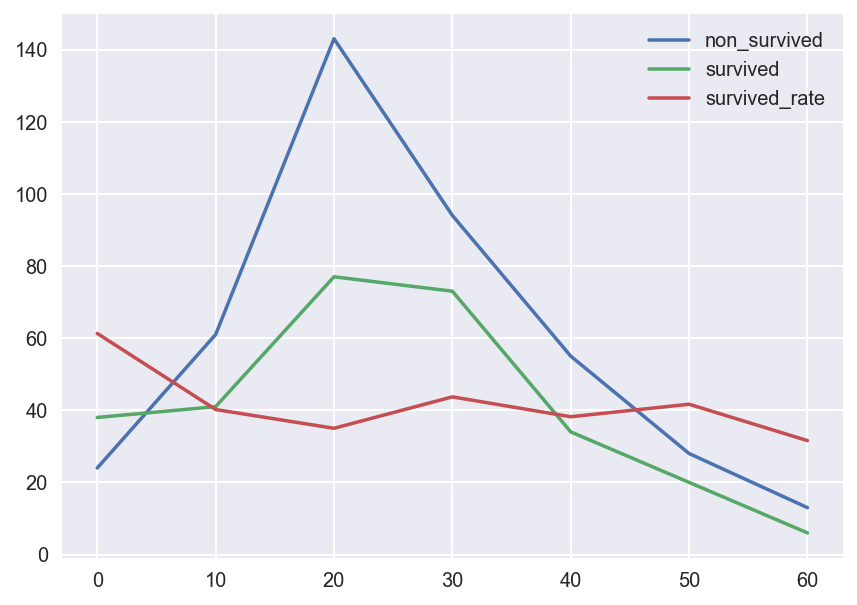

In [88]:
plt.figure(figsize=(7, 5))
plt.grid(True)

plt.plot(titanic_df4["non_survived"], label="non_survived")
plt.plot(titanic_df4["survived"], label="survived")
plt.plot(titanic_df4["survived_rate"], label="survived_rate")

plt.legend(loc=1)
plt.show()

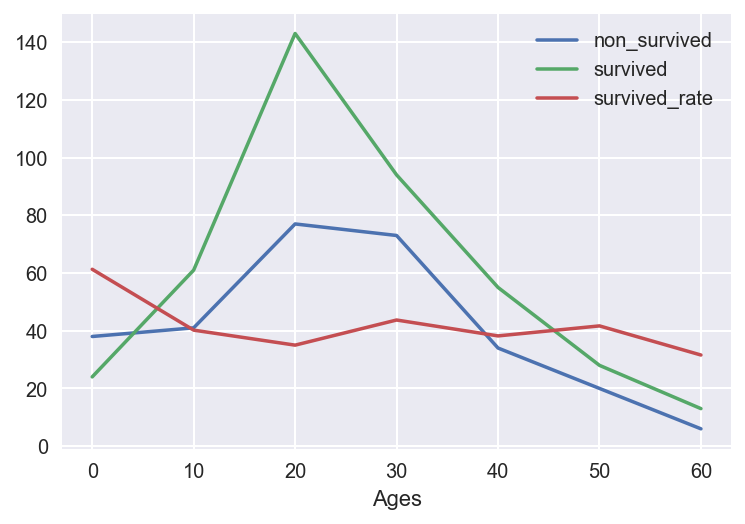

In [99]:
data = {
        "survived": titanic_df3[0],
        "non_survived": titanic_df3[1],
        "survived_rate": titanic_df3["survived_rate"],
    }

titanic_df5 = pd.DataFrame(data)
titanic_df5

plt.figure(figsize=(6, 6))    # 왜 사이즈 조절이 안 되는지
titanic_df5.plot()
plt.legend(loc=1)
plt.show()